
## 01MIAR - Actividad Video Valencia Pollution

### Autor: **Yeray Quiles Ferrández**

## NumPy y Pandas

### Objetivos:
- Aplicar diferentes técnicas de tratamiento de estructuras numéricas con Numpy y datos estructurados con Pandas.

### Instrucciones:
- Mantener una estructura limpia, comentando código y secuenciando los apartados con el código correspondiente que resuelva la actividad.
- Como criterio de evaluación se tendrá en cuenta el resultado, la consecución del mismo, estilo, comentarios y adecuación. Siempre será tenido en cuenta cualquier detalle técnico avanzado o no visto en clase relacionado con el tema (explicar el porqué y usabilidad).
- No está permitido compartir los resultados ni el código en ninguno de los foros.
- Revisar los temas así como las sesiones sobre Numpy y Pandas para aplicar dichos contenidos.
- Proponer las respuestas en las celdas a dicho efecto en cada punto, si se necesitan más celdas añadirlas en su sitio correspondiente
- Mostrar de manera clara la respuesta a las preguntas, mediante código


#### Descripción
El conjunto de datos "valencia_pollution_dataset.csv" (fichero disponible adjunto a la actividad) proviene de una descarga de datos del servicio web del ayuntamiento de la ciudad de Valencia de datos abiertos.

Los datos recabados de este servicio web son de mediciones cada hora de una serie de estaciones de contaminación atmosférica.

https://valencia.opendatasoft.com/explore/dataset/estacions-contaminacio-atmosferiques-estaciones-contaminacion-atmosfericas/information/

Cada estación realiza una serie de mediciones acerca de la calidad del aire, y de ciertas sustancias que se consideran importantes para analizar la contaminación atmosférica en la ciudad.

#### Columnas para trabajar:
- objectid: id de la estación
- nombre: nombre de la estación
- dirección: dirección de la estación
- tipozona: tipo de la zona, urbana o sub urbana
- parámetros: parámetroe medidos
- mediciones: fichero de mediciones
- tipoemision: tráfico o fondo
- so2: niveles de dióxido de azufre
- no2: niveles de dióxido de nitrogeno
- o3: niveles de ozono
- co: niveles de monóxido de carbono
- pm10: niveles de partículas en suspensión hasta 10um
- pm25: niveles de partículas en suspensión hasta 2,5um
- fecha_carga: timestamp de la actualización de los datos
- calidad_ambiental: estimación de la calidad del aire
- fiwareid: 
- geo_shape: coordenadas geográficas
- geo_point_2d: latitud-longitud

In [ ]:
from os import path
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## 01
### Carga de datos de csv (valencia_pollution_dataset.csv) en un DataFrame

In [ ]:
path_csv = ['data','valencia_pollution_dataset.csv']
path_csv_solved = path.join(*path_csv)

# Definir las columnas que necesitamos
columnas = [
    'objectid',
    'nombre', 
    'direccion',
    'tipozona',
    'parametros',
    'mediciones',
    'tipoemision',
    'so2',
    'no2',
    'o3',
    'co',
    'pm10',
    'pm25',
    'fecha_carga',
    'calidad_ambiental',
    'fiwareid',
    'geo_shape',
    'geo_point_2d'
]

# Leer el CSV original
df = pd.read_csv(path_csv_solved)  

# Filtrar solo las columnas que necesitamos(Aunque realmente no era necesario porque ya estaba prefiltrado)
df = df[columnas]

# Generamr el dataframe con las columnas solicitadas
df.to_csv(path_csv_solved, sep=',', index = False, na_rep = 'N/A')

In [63]:
display(df)

,objectid,nombre,direccion,tipozona,parametros,mediciones,tipoemision,so2,no2,o3,co,pm10,pm25,fecha_carga,calidad_ambiental,fiwareid,geo_shape,geo_point_2d
0,26,Pista de Silla,"C/ Filipinas, s/n",Urbana,NaN,NaN,Tráfico,0.0,10,71.0,0.7,8.0,3.0,2025-05-24T20:20:06+00:00,Razonablemente Buena,NaN,NaN,NaN
1,28,Viveros,Jardines de Viveros,Urbana,NaN,NaN,Fondo,0.0,5,88.0,NaN,NaN,NaN,2025-05-24T20:20:08+00:00,Razonablemente Buena,NaN,NaN,NaN
2,431,Olivereta,Av. del Cid amb Av. de les Tres Creus,Urbana,NaN,NaN,Tráfico,NaN,24,NaN,NaN,20.0,11.0,2025-05-24T20:20:11+00:00,Razonablemente Buena,NaN,NaN,NaN
3,432,Patraix,"Archiduque Carlos, 84ac",Urbana,NaN,NaN,Tráfico,NaN,15,NaN,NaN,20.0,11.0,2025-05-24T20:20:12+00:00,Razonablemente Buena,NaN,NaN,NaN
4,23,Francia,"Avda. de Francia, 60",Urbana,NaN,NaN,Tráfico,1.0,3,82.0,0.1,9.0,6.0,2025-05-24T20:20:04+00:00,Razonablemente Buena,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,26,Pista de Silla,"C/ Filipinas, s/n",Urbana,NaN,NaN,Tráfico,0.0,7,45.0,0.7,7.0,3.0,2025-05-26T10:20:07+00:00,Buena,NaN,NaN,NaN
392,22,Centro,Plaza Ayuntamiento,Urbana,NaN,NaN,Tráfico,NaN,11,NaN,NaN,15.0,8.0,2025-05-26T10:20:10+00:00,Buena,NaN,NaN,NaN
393,430,Dr. Lluch,"Calle Dr. Lluch, 48",Urbana,NaN,NaN,Tráfico,NaN,6,NaN,NaN,24.0,10.0,2025-05-26T10:20:11+00:00,Razonablemente Buena,NaN,NaN,NaN
394,431,Olivereta,Av. del Cid amb Av. de les Tres Creus,Urbana,NaN,NaN,Tráfico,NaN,15,NaN,NaN,20.0,11.0,2025-05-26T10:20:12+00:00,Razonablemente Buena,NaN,NaN,NaN


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   objectid           396 non-null    int64  
 1   nombre             396 non-null    object 
 2   direccion          396 non-null    object 
 3   tipozona           396 non-null    object 
 4   parametros         0 non-null      float64
 5   mediciones         0 non-null      float64
 6   tipoemision        396 non-null    object 
 7   so2                216 non-null    float64
 8   no2                396 non-null    int64  
 9   o3                 216 non-null    float64
 10  co                 108 non-null    float64
 11  pm10               288 non-null    float64
 12  pm25               288 non-null    float64
 13  fecha_carga        396 non-null    object 
 14  calidad_ambiental  396 non-null    object 
 15  fiwareid           0 non-null      float64
 16  geo_shape          0 non-n

In [65]:
df.dtypes

objectid               int64
nombre                object
direccion             object
tipozona              object
parametros           float64
mediciones           float64
tipoemision           object
so2                  float64
no2                    int64
o3                   float64
co                   float64
pm10                 float64
pm25                 float64
fecha_carga           object
calidad_ambiental     object
fiwareid             float64
geo_shape            float64
geo_point_2d         float64
dtype: object

## 02

### Obtención del número de estaciones que tienen un sensor para medir monóxido de carbono

In [66]:
#Contar estaciones con mediciones de CO (columna 'co' no nula)
estaciones_con_co = df['co'].notna().sum()
print(f"Número de estaciones con sensor de CO (Monóxido de carbono): {estaciones_con_co}")

Número de estaciones con sensor de CO (Monóxido de carbono): 108


### ¿Cuál es el rango temporal del dataset?

In [67]:
# Convertir la columna fecha_carga a datetime
df['fecha_carga'] = pd.to_datetime(df['fecha_carga'])

# Eliminar zona horaria
df['fecha_carga'] = df['fecha_carga'].dt.tz_localize(None)

# Obtener el rango temporal
fecha_minima = df['fecha_carga'].min()
fecha_maxima = df['fecha_carga'].max()

# Calcular la duración
duracion = fecha_maxima - fecha_minima
dias = duracion.days
horas = duracion.seconds // 3600
print(f"Duración total: {dias} días y {horas} horas")
horas_totales = duracion.total_seconds() / 3600
print(f"Duración total: {horas_totales:.1f} horas")

print(f"\nRango temporal del dataset:")
print(f"Fecha más antigua: {fecha_minima}")
print(f"Fecha más reciente: {fecha_maxima}")


Duración total: 1 días y 14 horas
Duración total: 38.0 horas

Rango temporal del dataset:
Fecha más antigua: 2025-05-24 20:20:04
Fecha más reciente: 2025-05-26 10:20:13


## 03

### Número de estación con la media más alta de mediciones de monóxido de carbono

In [68]:
# Agrupar por estación, calcula la media de CO y encuentra cuál tiene el valor máximo
estacion_max_co = df.groupby(['objectid', 'nombre'])['co'].mean().idxmax()

# Devulve la media máxima
media_max_co = df.groupby(['objectid', 'nombre'])['co'].mean().max()

print(f"Estación con mayor media de CO:")
print(f"- ID: {estacion_max_co[0]}")
print(f"- Nombre: {estacion_max_co[1]}")
print(f"- Media de CO: {media_max_co:.2f}")

Estación con mayor media de CO:
- ID: 26
- Nombre: Pista de Silla
- Media de CO: 0.70


## 04
### Realizar el histograma de dióxido de nitrógeno de la estación del punto anterior

In [69]:
# Filtrar datos de la estación
datos_estacion = df[df['objectid'] == estacion_max_co[0]]

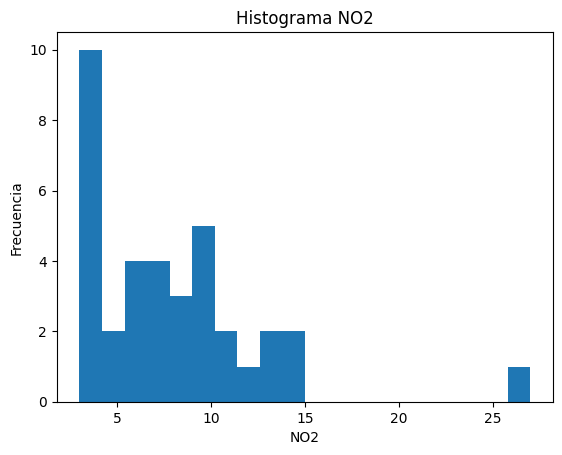

In [ ]:
# Histograma con matplotlib
plt.hist(datos_estacion['no2'].dropna(), bins=20)
plt.title('Histograma NO2')
plt.xlabel('NO2')
plt.ylabel('Frecuencia')
plt.show()

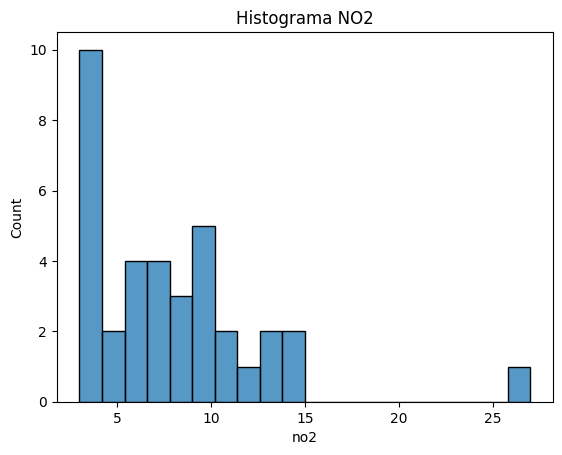

In [71]:
# Histograma con seaborn
sns.histplot(data=datos_estacion, x='no2', bins=20)
plt.title('Histograma NO2')
plt.show()

In [72]:
# Histograma con plotly
fig = px.histogram(datos_estacion, x='no2', nbins=20, title='Histograma NO2')
fig.write_html("histograma_no2.html")

print('Gráfico interactivo guardado como HTML.')

Gráfico interactivo guardado como HTML.


## 05
### Realizar gráfica con  la línea temporal de las mediciones de ozono de la estación del punto anterior. Pista, la columna 'fecha_carga' habría que cambiarla de tipo.

In [ ]:
# Filtrar datos de la estación y ordenar por fecha
datos_estacion = df[df['objectid'] == estacion_max_co[0]].sort_values('fecha_carga')

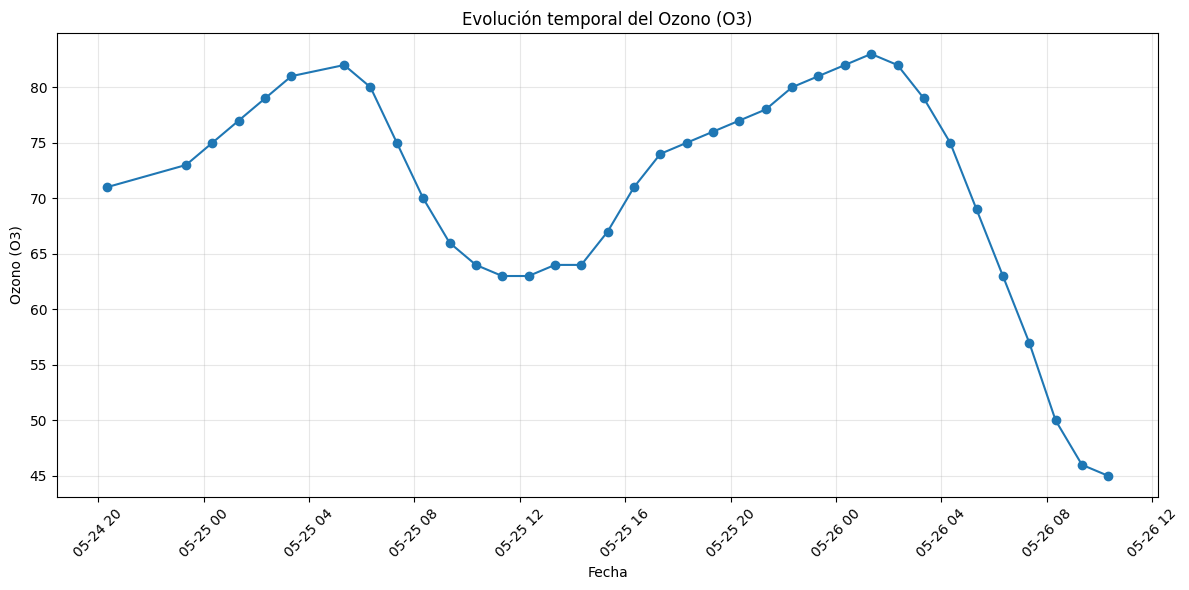

In [75]:
# Gráfica temporal con matplotlib
plt.figure(figsize=(12, 6))
plt.plot(datos_estacion['fecha_carga'], datos_estacion['o3'], marker='o')
plt.title('Evolución temporal del Ozono (O3)')
plt.xlabel('Fecha')
plt.ylabel('Ozono (O3)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

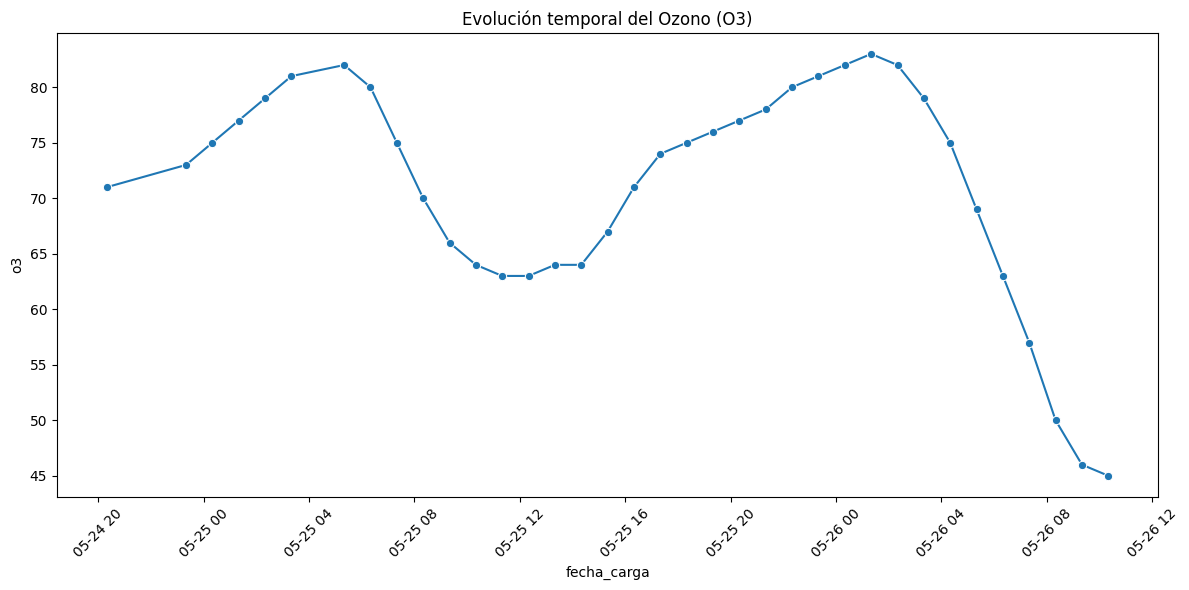

In [76]:
# Gráfica temporal con seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=datos_estacion, x='fecha_carga', y='o3', marker='o')
plt.title('Evolución temporal del Ozono (O3)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [77]:
# Gráfica temporal con plotly
fig = px.line(datos_estacion, x='fecha_carga', y='o3', 
              title='Evolución temporal del Ozono (O3)',
              markers=True)
fig.write_html("grafica_ozono_temporal.html")

print('Gráfico interactivo guardado como HTML.')

Gráfico interactivo guardado como HTML.
